## Handwritten digits classifier - Keras

## Imports

In [19]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.optimizers import SGD 
from keras.models import load_model
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

## Constants

In [3]:
NO_OF_CLASSESS=10
VALIDATION_SIZE=10000
IMAGE_WIDTH=28
IMAGE_HEIGHT=28
NO_OF_CHANNELS=1  # ONLY BLACK AND WHITE
TOTAL_INPUTS = IMAGE_HEIGHT*IMAGE_WIDTH

In [4]:
# Loading data from mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
print(x_train.shape)

(60000, 28, 28)


In [5]:
print("Number of samples in training set:",len(x_train))
print("Number of samples in testing set:",len(x_test))

Number of samples in training set: 60000
Number of samples in testing set: 10000


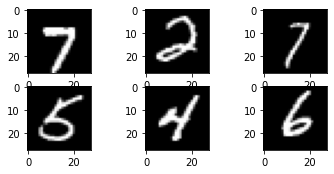

In [6]:
# Check the dataset
for i in range(6):
    plt.subplot(330+i+1)
    rand_num=np.random.randint(0,len(x_train))
    plt.imshow(x_train[rand_num], cmap=plt.get_cmap('gray'))
plt.show()

In [7]:
img_rows = x_train[0].shape[0]
img_cols = x_train[0].shape[1]

# Keras need 4th dimension for colour
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

# store the shape of a single image 
input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the data
x_train /= 255
x_test /= 255

In [8]:
y_train=np.eye(NO_OF_CLASSESS)[y_train]
y_test=np.eye(NO_OF_CLASSESS)[y_test]

In [9]:
num_pixels = x_train.shape[1] * x_train.shape[2]
num_pixels

784

# Model CNN
- We're constructing a simple but effective CNN that uses 32 filters of size 3x3
- We've added a 2nd CONV layer of 64 filters of the same size 3x2
- We then downsample our data to 2x2, here he apply a dropout where p is set to 0.25
- We then flatten our Max Pool output that is connected to a Dense/FC layer that has an output size of 128
- How we apply a dropout where P is set to 0.5
- Thus 128 output is connected to another FC/Dense layer that outputs to the 10 categorical units

In [10]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape))  # Layers
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) # Reduces the dimensionalty
model.add(Dropout(0.25))  # To avoid overfitting
model.add(Flatten())  # Multidim to vector
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(NO_OF_CLASSESS, activation='softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = SGD(0.01),
              metrics = ['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

## Training our model

In [11]:
%%time
batch_size = 30
epochs = 10

history = model.fit(x_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
2000/2000 [==============================] - 63s 31ms/step - loss: 0.5797 - accuracy: 0.8198 - val_loss: 0.2053 - val_accuracy: 0.9407
Epoch 2/10
2000/2000 [==============================] - 65s 33ms/step - loss: 0.2909 - accuracy: 0.9137 - val_loss: 0.1443 - val_accuracy: 0.9575
Epoch 3/10
2000/2000 [==============================] - 68s 34ms/step - loss: 0.2221 - accuracy: 0.9333 - val_loss: 0.1080 - val_accuracy: 0.9667
Epoch 4/10
2000/2000 [==============================] - 70s 35ms/step - loss: 0.1704 - accuracy: 0.9491 - val_loss: 0.0830 - val_accuracy: 0.9748
Epoch 5/10
2000/2000 [==============================] - 72s 36ms/step - loss: 0.1408 - accuracy: 0.9582 - val_loss: 0.0679 - val_accuracy: 0.9787
Epoch 6/10
2000/2000 [==============================] - 70s 35ms/step - loss: 0.1202 - accuracy: 0.9651 - val_loss: 0.0610 - val_accuracy: 0.9800
Epoch 7/10
2000/2000 [==============================] - 87s 44ms/step - loss: 0.1038 - accuracy: 0.9688 - val_loss: 0.0509 -

In [12]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.041116878390312195
Test accuracy: 0.9860000014305115


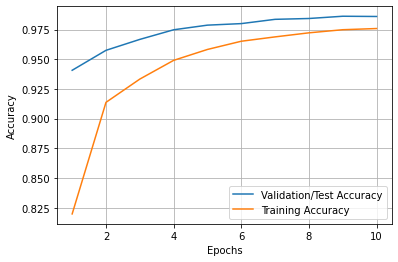

In [17]:
# Plotting our accuracy charts
import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)
line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [15]:
print(history.history)

{'loss': [0.5796613097190857, 0.29088065028190613, 0.22208254039287567, 0.17040005326271057, 0.14084680378437042, 0.1202397271990776, 0.10377375036478043, 0.09444109350442886, 0.08428999781608582, 0.08108294010162354], 'accuracy': [0.8197500109672546, 0.9136999845504761, 0.9332833290100098, 0.9490500092506409, 0.9582333564758301, 0.965149998664856, 0.9688166379928589, 0.9722333550453186, 0.9748499989509583, 0.975849986076355], 'val_loss': [0.2053493708372116, 0.14433690905570984, 0.10801903158426285, 0.0829612985253334, 0.0678827166557312, 0.061040960252285004, 0.05089806765317917, 0.0478130504488945, 0.042357753962278366, 0.041116878390312195], 'val_accuracy': [0.9406999945640564, 0.9574999809265137, 0.96670001745224, 0.9747999906539917, 0.9786999821662903, 0.9800000190734863, 0.9836000204086304, 0.9843000173568726, 0.9861999750137329, 0.9860000014305115]}


In [18]:
# Saving the model
model.save("C:/Users/LENOVO/DeepLearningCV/trained_model1.h5")
# h5 is heirarchical data format

In [21]:
# Load the classifier
classifier = load_model('C:/Users/LENOVO/DeepLearningCV/trained_model1.h5')

In [27]:
def draw_test(name, pred, input_im):
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(input_im, 0, 0, 0, imageL.shape[0] ,cv2.BORDER_CONSTANT,value=BLACK)
    expanded_image = cv2.cvtColor(expanded_image, cv2.COLOR_GRAY2BGR)
    cv2.putText(expanded_image, str(pred), (152, 70) , cv2.FONT_HERSHEY_COMPLEX_SMALL,4, (255,255,0), 2)
    cv2.imshow(name, expanded_image)

for i in range(0,5):
    rand = np.random.randint(0,len(x_test))
    input_im = x_test[rand]

    imageL = cv2.resize(input_im, None, fx=4, fy=4, interpolation = cv2.INTER_CUBIC)
    input_im = input_im.reshape(1,28,28,1) 

    res = str(classifier.predict_classes(input_im, 1, verbose = 0)[0])

    draw_test("Prediction", res, imageL) 
    cv2.waitKey(0)

cv2.destroyAllWindows()